In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [64]:
x , y = make_moons(n_samples=250, noise = 0.05, random_state = 42)

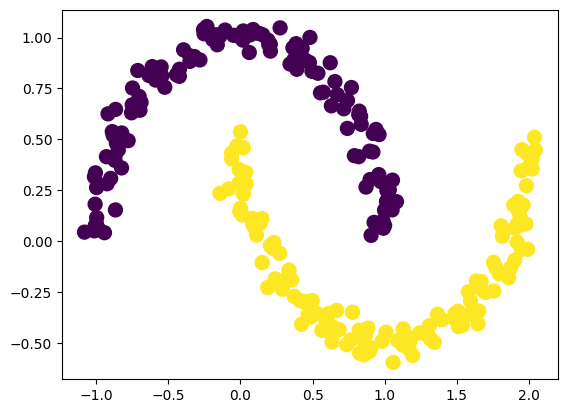

In [65]:
plt.scatter(x[:,0],x[:,1],c=y, s=100)

In [66]:
model = Sequential()

In [67]:
model.add(Dense(10, activation='sigmoid', input_dim = 2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
# you can see the all the weight value that what are randomly initialize
model.get_weights()

[array([[-0.47057563,  0.16113007, -0.17212892,  0.2552988 , -0.6178414 ,
         -0.09501415, -0.11565888, -0.38050613,  0.08487111, -0.2942789 ],
        [-0.6241097 ,  0.1939367 ,  0.02710432,  0.58911484, -0.50603104,
         -0.11028647,  0.03841031,  0.11651766,  0.3802125 , -0.3434589 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.4792843 , -0.45381638, -0.13229245, -0.5347984 ,  0.1335876 ,
          0.04759032, -0.40341008,  0.02584898,  0.42062712, -0.5108685 ],
        [ 0.03718197, -0.34398443,  0.43141687, -0.13945332, -0.20523378,
          0.4793942 , -0.22300303,  0.18737572, -0.06913301, -0.391511  ],
        [ 0.27369046,  0.39361095,  0.0445565 ,  0.02292943, -0.46521625,
          0.11529678, -0.42384282, -0.25751296,  0.23878449, -0.133439  ],
        [-0.09994391, -0.07361138,  0.11535293,  0.5144985 ,  0.13940656,
         -0.2994701 ,  0.30115873, -0.06137392, -0.31809458,  0.25789386],
        [-0.17893

In [70]:
old_weight = model.get_weights()[0]

In [71]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [72]:
print(x.shape, x_train.shape, x_test.shape)

(250, 2) (200, 2) (50, 2)


In [73]:
print(x_train.shape, x_test.shape)  # Should be (200, 2), (50, 2)
print(y_train.shape, y_test.shape)  # Should be (200, 1), (50, 1)


(200, 2) (50, 2)
(200,) (50,)


In [74]:
y_test = y_test.reshape(-1, 1)

In [75]:
model.fit(x_train, y_train, epochs=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5017 - loss: 0.7512


In [76]:
new_weight = model.get_weights()[0]

In [77]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [78]:
gradinet = (new_weight - old_weight) / model.optimizer.get_config()['learning_rate']
percent_change = abs(100 * (old_weight - new_weight) / old_weight)

In [79]:
gradinet

array([[-0.00780821, -0.00672042,  0.01803041,  0.00083446, -0.01788139,
        -0.0128746 , -0.01016259,  0.01576543,  0.00295043,  0.00941753],
       [ 0.00369549,  0.00298023, -0.0080429 , -0.00035763,  0.00917912,
         0.00569969,  0.00439957, -0.00749528, -0.0013411 , -0.00438094]],
      dtype=float32)

In [80]:
percent_change

array([[1.6592888e-03, 4.1708066e-03, 1.0474943e-02, 3.2685819e-04,
        2.8941720e-03, 1.3550195e-02, 8.7866941e-03, 4.1432786e-03,
        3.4763652e-03, 3.2002071e-03],
       [5.9212156e-04, 1.5367036e-03, 2.9673876e-02, 6.0705966e-05,
        1.8139431e-03, 5.1680808e-03, 1.1454134e-02, 6.4327451e-03,
        3.5272501e-04, 1.2755359e-03]], dtype=float32)

In [81]:
old_weight

array([[-0.47057563,  0.16113007, -0.17212892,  0.2552988 , -0.6178414 ,
        -0.09501415, -0.11565888, -0.38050613,  0.08487111, -0.2942789 ],
       [-0.6241097 ,  0.1939367 ,  0.02710432,  0.58911484, -0.50603104,
        -0.11028647,  0.03841031,  0.11651766,  0.3802125 , -0.3434589 ]],
      dtype=float32)

In [82]:
new_weight

array([[-0.47058344,  0.16112335, -0.17211089,  0.25529963, -0.6178593 ,
        -0.09502703, -0.11566904, -0.38049036,  0.08487406, -0.29426947],
       [-0.624106  ,  0.19393969,  0.02709628,  0.5891145 , -0.50602186,
        -0.11028077,  0.03841471,  0.11651017,  0.38021114, -0.34346327]],
      dtype=float32)